In [168]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



import the dataset

In [204]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [28]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

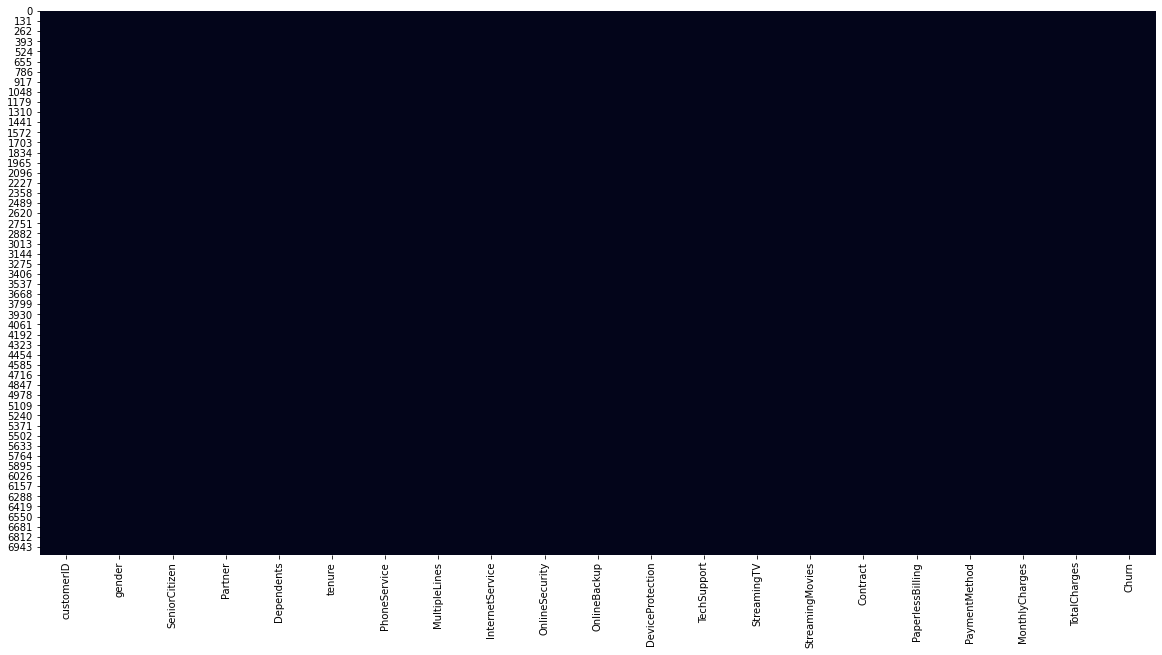

In [32]:
#Checking missing values
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

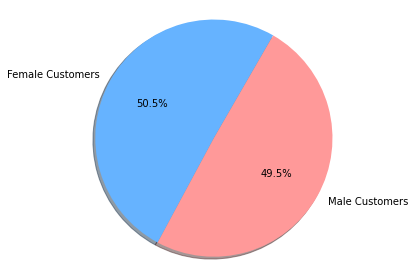

In [34]:
#vizualtisation by gender
Gender_value = df["gender"].value_counts()
labels = ["Female Customers","Male Customers"]
colors = ['#66b3ff', '#ff9999']
fig1, f1 = plt.subplots()
f1.pie(Gender_value,labels=labels, colors = colors, autopct='%1.1f%%',shadow=True, startangle=60) 
f1.axis('equal')
plt.tight_layout()
plt.show()

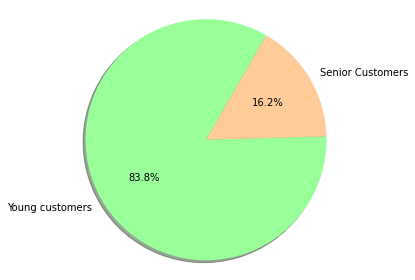

In [36]:
#vizualtisation by age (young , senior)
Senior_value = df["SeniorCitizen"].value_counts()
labels = ["Young customers","Senior Customers"]
colors = ['#99ff99', '#ffcc99']
fig1, f1 = plt.subplots()
f1.pie(Senior_value,labels=labels, colors = colors, autopct='%1.1f%%',shadow=True, startangle=60) 
f1.axis('equal')
plt.tight_layout()
plt.show()

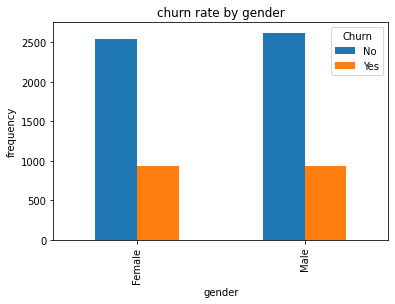

In [47]:
#vizualtisation of churn rate by gender
df.groupby(["gender","Churn"]).size().unstack().plot(kind="bar",title="churn rate by gender")
plt.ylabel('frequency')
plt.show()

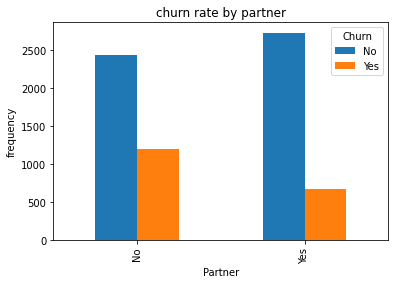

In [49]:
#vizualtisation of churn rate by costumer partners
df.groupby(["Partner","Churn"]).size().unstack().plot(kind="bar",title="churn rate by partner")
plt.ylabel('frequency')
plt.show()

Visualization shows that customer without partner have more chance to churn

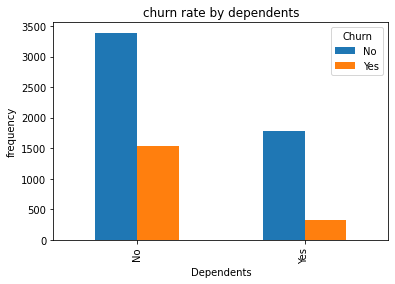

In [51]:
#vizualtisation of churn rate by costumer dependents 
df.groupby(["Dependents","Churn"]).size().unstack().plot(kind="bar",title="churn rate by dependents")
plt.ylabel('frequency')
plt.show()

Visualization shows that customer without dependents have more chance to churn

In [63]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Number of Customers by their tenure')

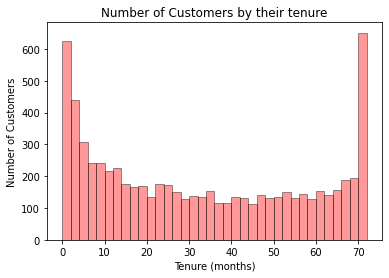

In [60]:
ax = sns.distplot(df['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 10})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Number of Customers by their tenure')

Text(0.5, 1.0, 'Number of Customers by Contract Type')

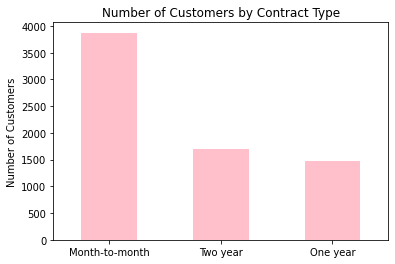

In [64]:
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.5,color="pink")
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Contract Type')

AS we can see from this graph most of customers are in the month to month contract .
why there are equal number of customers in One year and Two year contract.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Two Year Contract')

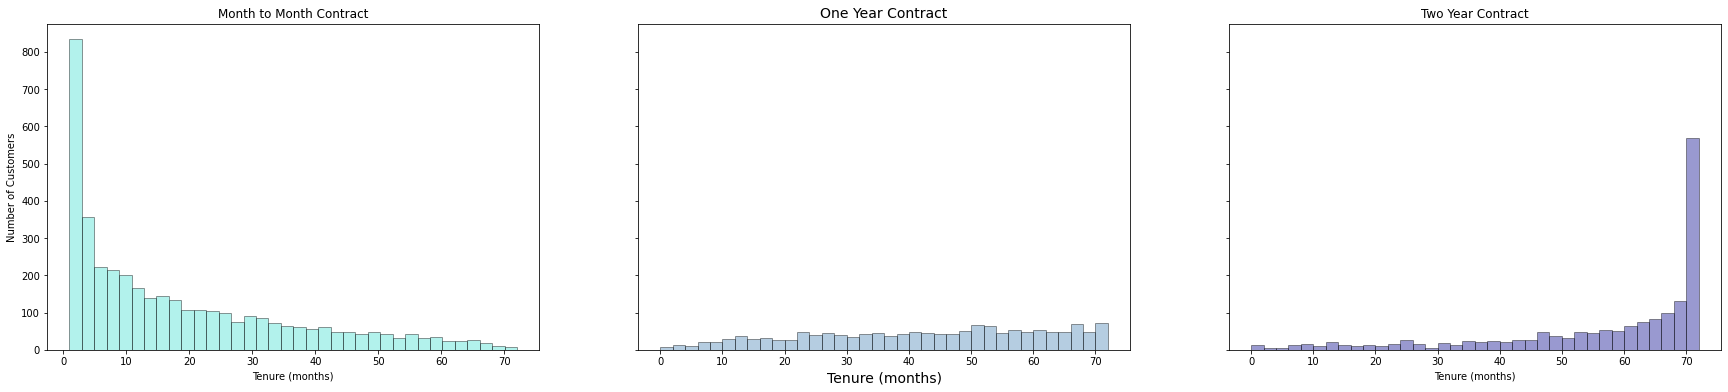

In [72]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (30,6))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

interestingly most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.

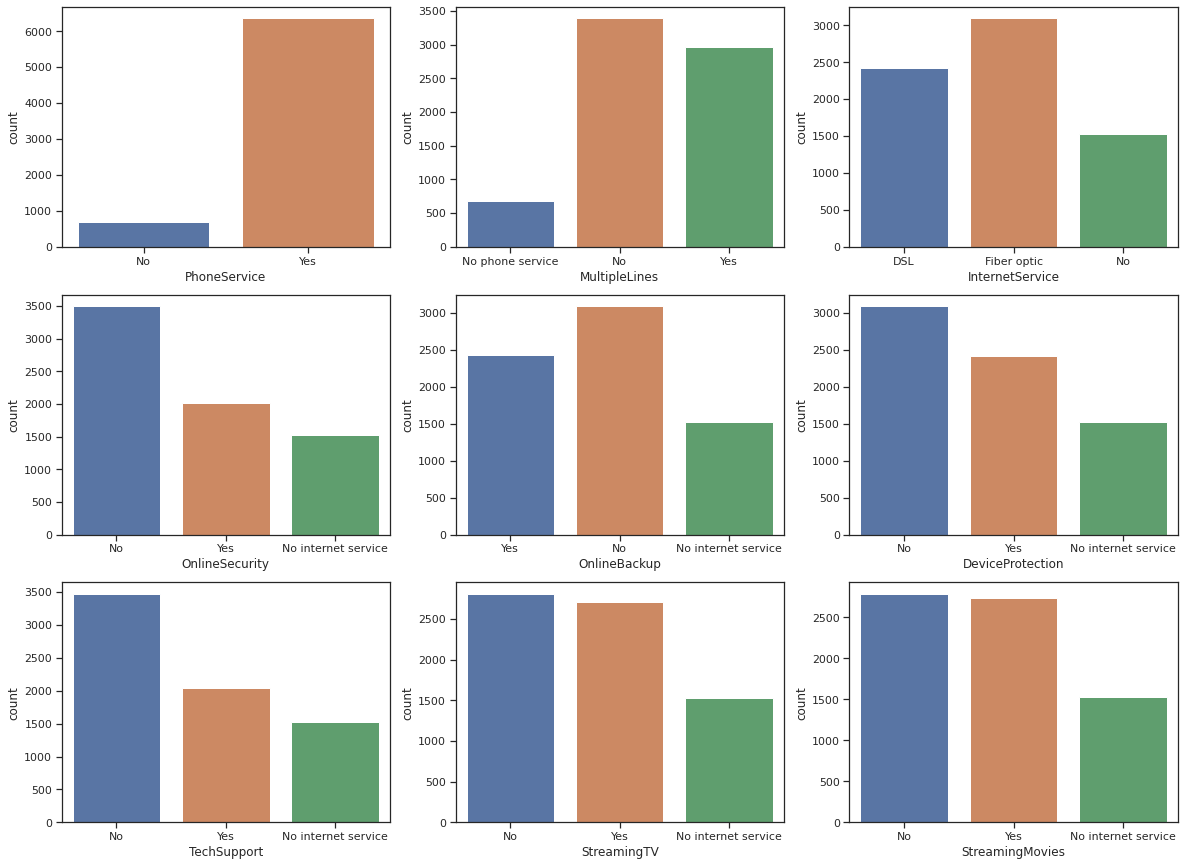

In [77]:
sns.set(style="ticks", color_codes=True)

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (20,15))
sns.countplot(x = "PhoneService", data = df, ax=axes[0][0])
sns.countplot(x = "MultipleLines", data = df, ax=axes[0][1])
sns.countplot(x = "InternetService", data = df, ax=axes[0][2])
sns.countplot(x = "OnlineSecurity", data = df, ax=axes[1][0])
sns.countplot(x = "OnlineBackup", data = df, ax=axes[1][1])
sns.countplot(x = "DeviceProtection", data = df, ax=axes[1][2])
sns.countplot(x = "TechSupport", data = df, ax=axes[2][0])
sns.countplot(x = "StreamingTV", data = df, ax=axes[2][1])
sns.countplot(x = "StreamingMovies", data = df, ax=axes[2][2])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show(fig)

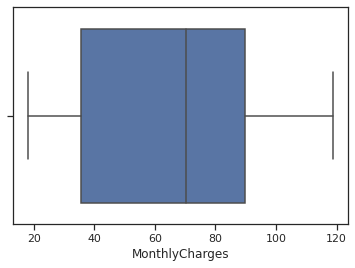

In [79]:
sns.boxplot(x=df['MonthlyCharges'])

In [205]:
df['Churn'] = df['Churn'].map(lambda s :1  if s =='Yes' else 0)

In [231]:
df.head(100)

,customerID,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,TechSupport,PaperlessBilling,Churn,Fiber optic,DSL,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check
0,7590-VHVEG,0,1,0,1,0,0,1,0,0,1,0,0,0,1
1,5575-GNVDE,0,0,0,34,1,0,0,0,0,1,1,0,0,0
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,1,0,0,0,0
3,7795-CFOCW,0,0,0,45,1,1,0,0,0,1,1,0,0,0
4,9237-HQITU,0,0,0,2,0,0,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8637-XJIVR,0,0,0,12,1,0,1,1,1,0,0,0,0,1
96,9803-FTJCG,0,1,1,71,1,1,1,0,0,1,1,0,1,0
97,0278-YXOOG,0,0,0,5,0,0,0,1,0,0,0,0,0,0
98,3212-KXOCR,0,0,0,52,0,0,0,0,0,0,0,1,0,0


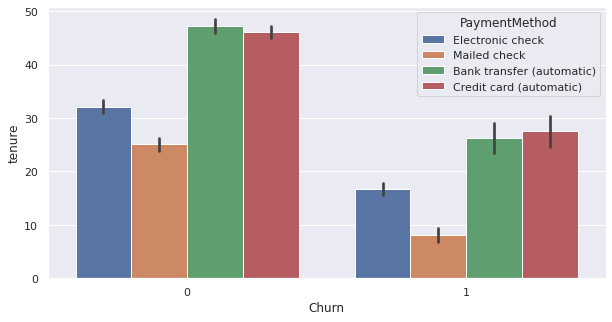

In [99]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='Churn',y='tenure',hue='PaymentMethod',data=df);

ENCODAGE:

In [206]:
#Gender
df = pd.get_dummies(data=df, columns=['gender'] ,  drop_first=True)
df.gender_Male.value_counts()

1    3555
0    3488
Name: gender_Male, dtype: int64

In [207]:
df['Partner'] = df['Partner'].map(lambda s :1  if s =='Yes' else 0)

In [208]:
df['Dependents'] = df['Dependents'].map(lambda s :1  if s =='Yes' else 0)

In [209]:
df['SeniorCitizen'] = df['SeniorCitizen'].map(lambda s :1  if s =='Yes' else 0)

In [210]:
df['PhoneService'] = df['PhoneService'].map(lambda s :1  if s =='Yes' else 0)

In [211]:
df['PaperlessBilling'] = df['PaperlessBilling'].map(lambda s :1  if s =='Yes' else 0)

In [212]:
print("values before encoding :\n ",df['MultipleLines'].value_counts())
df['MultipleLines'].replace('No phone service','No', inplace=True)
df['MultipleLines'] = df['MultipleLines'].map(lambda s :1  if s =='Yes' else 0)
print("\n values after encoding : \n",df['MultipleLines'].value_counts())

values before encoding :
  No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

 values after encoding : 
 0    4072
1    2971
Name: MultipleLines, dtype: int64


In [213]:
#Internet Service
print("values before encoding : \n",df['InternetService'].value_counts())
df['Fiber optic'] = df['InternetService'].map(lambda s :1  if s =='Fiber optic' else 0)
df['DSL'] = df['InternetService'].map(lambda s :1  if s =='DSL' else 0)
print("\n values after encoding : \n")
print("Fiber Optic : \n",df['Fiber optic'].value_counts())
print("DSL : \n",df['DSL'].value_counts())
df.drop(['InternetService'], axis=1, inplace=True)

values before encoding : 
 Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

 values after encoding : 

Fiber Optic : 
 0    3947
1    3096
Name: Fiber optic, dtype: int64
DSL : 
 0    4622
1    2421
Name: DSL, dtype: int64


In [214]:
# Online Security ,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies

df['OnlineSecurity'] = df['OnlineSecurity'].map(lambda s :1  if s =='Yes' else 0)
df['OnlineBackup'] = df['OnlineBackup'].map(lambda s :1  if s =='Yes' else 0)
df['DeviceProtection'] = df['DeviceProtection'].map(lambda s :1  if s =='Yes' else 0)
df['TechSupport'] = df['TechSupport'].map(lambda s :1  if s =='Yes' else 0)
df['StreamingTV'] = df['StreamingTV'].map(lambda s :1  if s =='Yes' else 0)
df['StreamingMovies'] = df['StreamingMovies'].map(lambda s :1  if s =='Yes' else 0)

In [215]:
#Contract
print(df['Contract'].value_counts())
df = pd.get_dummies(data=df, columns=['Contract'] ,drop_first=True)

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


In [216]:
#Payment Method
df['PaymentMethod'].value_counts()
df = pd.get_dummies(data=df, columns=['PaymentMethod'] ,drop_first=True)

In [229]:
df.dtypes

customerID                               object
SeniorCitizen                             int64
Partner                                   int64
Dependents                                int64
tenure                                    int64
PhoneService                              int64
MultipleLines                             int64
OnlineSecurity                            int64
OnlineBackup                              int64
DeviceProtection                          int64
TechSupport                               int64
PaperlessBilling                          int64
Churn                                     int64
gender_Male                               uint8
Fiber optic                               int64
DSL                                       int64
Contract_One year                         uint8
Contract_Two year                         uint8
PaymentMethod_Credit card (automatic)     uint8
PaymentMethod_Electronic check            uint8
PaymentMethod_Mailed check              

In [193]:
df["TotalCharges"].value_counts()


20.2       11
19.75       9
19.65       8
20.05       8
19.9        8
           ..
219         1
4414.3      1
1035.7      1
1328.15     1
2292.75     1
Name: TotalCharges, Length: 6530, dtype: int64

In [218]:
list0=df[ df['tenure']==0].index
df=df.drop(df.index[list0])

#all categorical rows in Total charges have tenure months equal to 0

In [219]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],downcast='float')

Text(0.5, 1.0, 'Correlation Matrix')

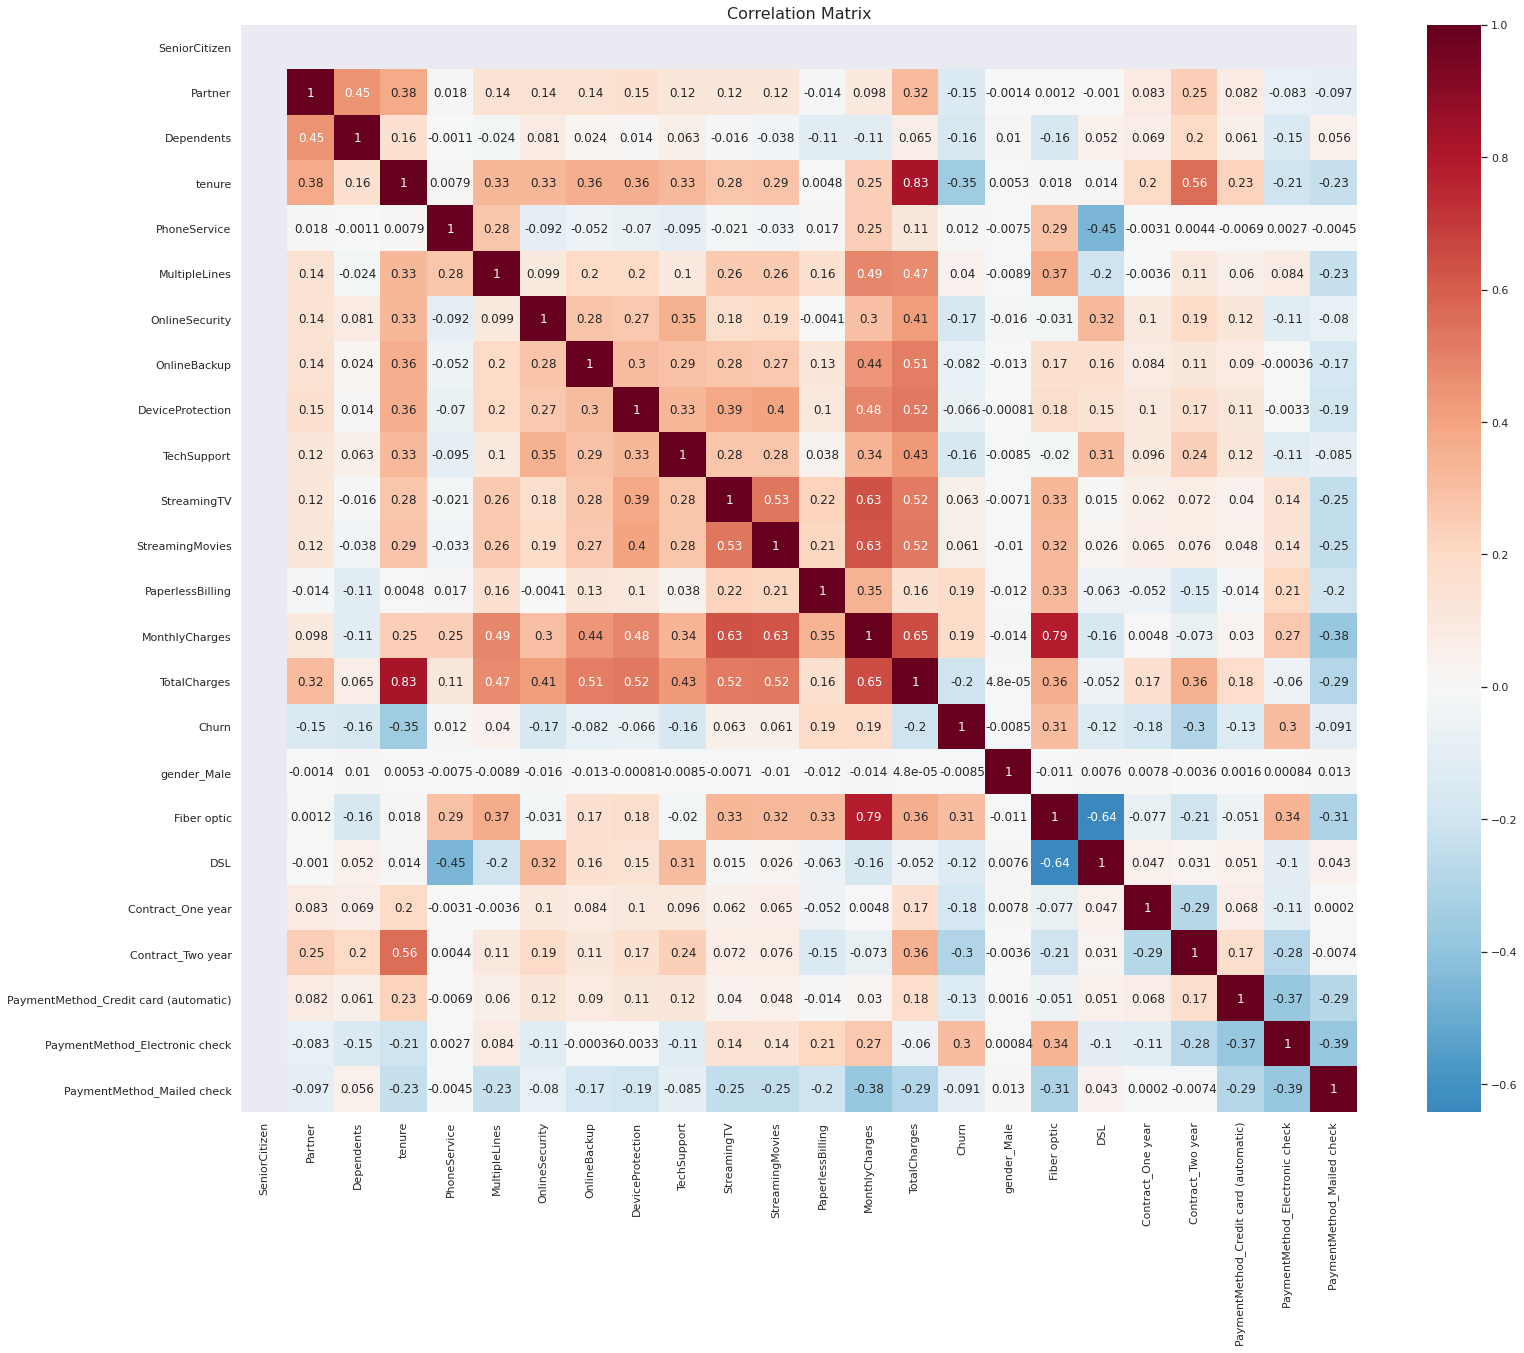

In [220]:
#Correclation Matrix
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),cmap="RdBu_r",center=0.0, annot=True)
plt.title('Correlation Matrix', fontsize=16)

Text(0.5, 1.0, 'Correlation Matrix')

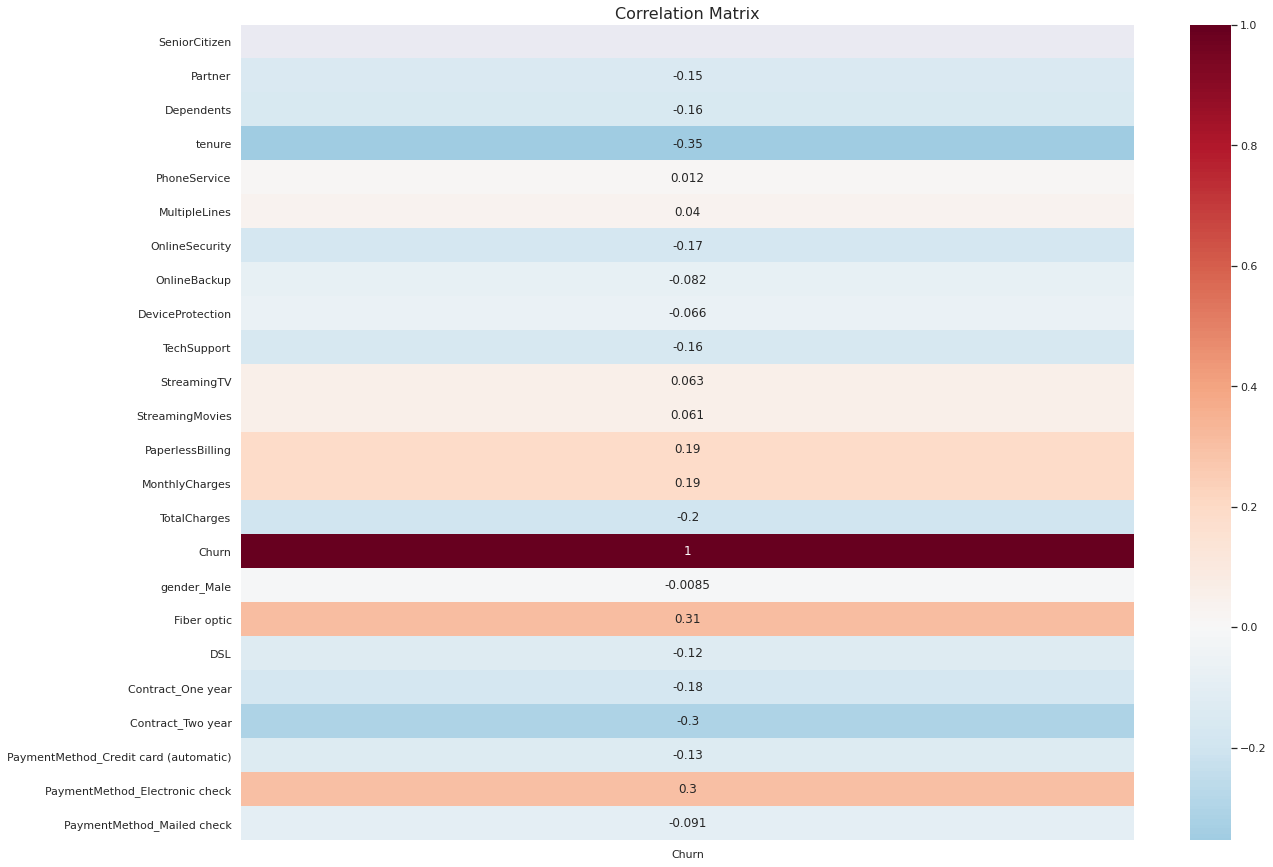

In [221]:
#Correclation between Churn Value and all features
plt.figure(figsize=(20,15))
sns.heatmap(df.corr()[['Churn']],cmap="RdBu_r",center=0.0, annot=True)
plt.title('Correlation Matrix', fontsize=16)

Features Selection

In [222]:
def strongcorr (m,y):
  l=m.shape[1]
  fs= set()
  for i in range(l):
    max=i
    min=i
    for j in range(i):
      if(abs(m.iloc[i,j]>0.6)):
        if(abs(y[j][0])>abs(y[i][0])):
          min=max
          max=j
        else:
          min=j
        fs.add(m.columns[min])
  return(fs)

In [223]:
df1=df.drop(['Churn'], axis=1)
m=df1.corr()
y=df.corr()[['Churn']]
y=y[ y['Churn']!=1].to_numpy()
strongcorr(m,y)

{'MonthlyCharges', 'StreamingMovies', 'StreamingTV', 'TotalCharges'}

In [227]:
#2nd method
def weakcorr (Y):
  f2= set()
  for i in range(Y.shape[0]):
    if abs(Y.iloc[i][0])>0.6 :
      f2.add(Y.index[i])
  return(f2)
weakcorr(df.corr()[['Churn']])

{'Churn'}

In [225]:
df.drop(['MonthlyCharges', 'StreamingMovies', 'StreamingTV', 'TotalCharges'],axis=1,inplace=True)

In [228]:
def weakcorr (Y):
  f2= set()
  for i in range(Y.shape[0]):
    if abs(Y.iloc[i][0])<0.1 :
      f2.add(Y.index[i])
  return(f2)
weakcorr(df.corr()[['Churn']])

{'DeviceProtection',
 'MultipleLines',
 'OnlineBackup',
 'PaymentMethod_Mailed check',
 'PhoneService',
 'gender_Male'}

In [230]:
df.drop(['gender_Male',
 'MultipleLines',
 'PhoneService',
 'DeviceProtection','OnlineBackup','PaymentMethod_Mailed check'], axis=1,inplace=True)

In [232]:
df.columns

Index(['customerID', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'OnlineSecurity', 'TechSupport', 'PaperlessBilling', 'Churn',
       'Fiber optic', 'DSL', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check'],
      dtype='object')

MODELING :